## 最小二乘法拟合

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
def object_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

def res_func(p,x,y):
    res = fit_func(p,x)-y
    return res    

In [3]:
x = np.linspace(0,1,10)
x_points = np.linspace(0, 1, 1000)

y_ = object_func(x)
y = [np.random.normal(0, 0.05)+ num for num in y_]


def fitting(M):
    # 随机初始化多项式的参数
    p_init = np.random.rand(M+1)
    
    p_lsq = leastsq(res_func, p_init, args=(x, y))
    
    print('Fitting Parameters', p_lsq[0])
    
    plt.plot(x_points, object_func(x_points), label="real curve")
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.scatter(x, y, label='real points')
    plt.legend()
    
    return p_lsq

Fitting Parameters [-0.00665022]


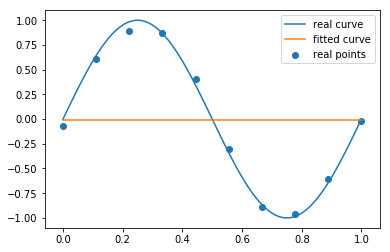

In [4]:
# M=0 
p_lsq_0 = fitting(M=0)

Fitting Parameters [-1.27239253  0.62954605]


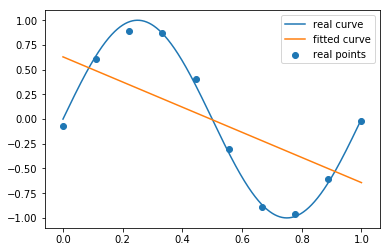

In [5]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters [  1.31716168  18.18935824 -29.83855361  10.4993031   -0.11797047]


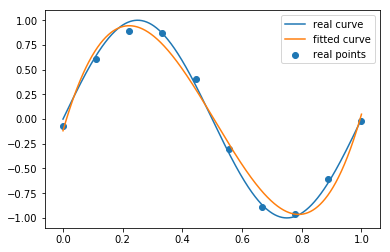

In [6]:
# M=4
p_lsq_4 = fitting(M=4)

Fitting Parameters [ 2.01182830e+03 -8.87673976e+03  1.67127768e+04 -1.76337550e+04
  1.14133096e+04 -4.57187978e+03  1.07742729e+03 -1.46759732e+02
  1.38381639e+01 -6.57454146e-02]


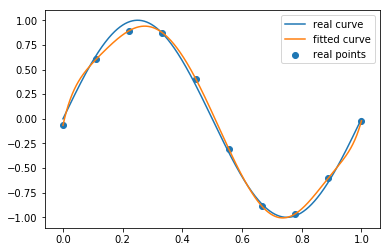

In [7]:
# M=9 
p_lsq_9 = fitting(M=9)

## 正则化

In [8]:
regularization = 0.001

# L2范数正则化
def res_func_regularization_L2(p, x, y):
    res = fit_func(p,x)-y
    res = np.append(res, np.sqrt(1/2*regularization*np.square(p)))
    return res

# L1范数正则化
def res_func_regularization_L1(p, x, y):
    res = fit_func(p,x)-y
    res = np.append(res, np.sqrt(1/2*regularization*abs(p)))
    return res

In [9]:
def fitting_regular(M, res_func_regular):
    p_init = np.random.rand(M+1)
    p_lsq_regular = leastsq(res_func_regular, p_init, args=(x,y) )
    p_lsq = leastsq(res_func, p_init, args=(x,y) )

    
    print('Fitting Parameters', p_lsq_regular[0])
    
    plt.plot(x_points, object_func(x_points), label="real curve")
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x_points, fit_func(p_lsq_regular[0], x_points), label='regularization')
    plt.scatter(x, y, label='real points')
    plt.legend()

Fitting Parameters [-5.52849785e+00 -8.54181668e-01  3.16936629e+00  5.78917301e+00
  5.92697515e+00  2.34621851e+00 -5.30505865e+00 -1.22854994e+01
  6.73905567e+00  1.17340695e-02]


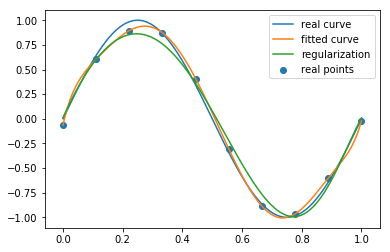

In [10]:
fitting_regular(9, res_func_regularization_L2)

Fitting Parameters [-8.10076651e+00 -1.40184500e-06  3.05834267e-05  1.14003336e+01
  8.73550891e+00 -1.05603449e-05 -5.80657327e+00 -1.40587367e+01
  7.88424915e+00 -7.46728196e-02]


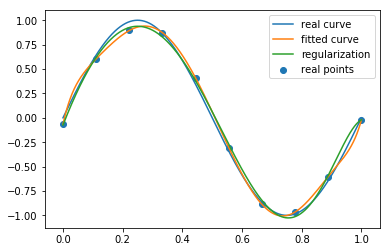

In [11]:
fitting_regular(9, res_func_regularization_L1)